# # Homework 1

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
admissions_csv= pd.read_csv('admissions.csv')
admissions_csv.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [3]:
admissions_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


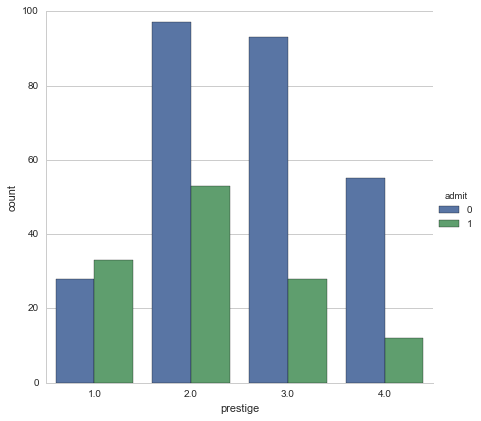

In [11]:
# for each prestige level, how many students are admitted and how many are rejected?

sns.factorplot('prestige', data=admissions_csv ,hue='admit', kind='count', size=6)

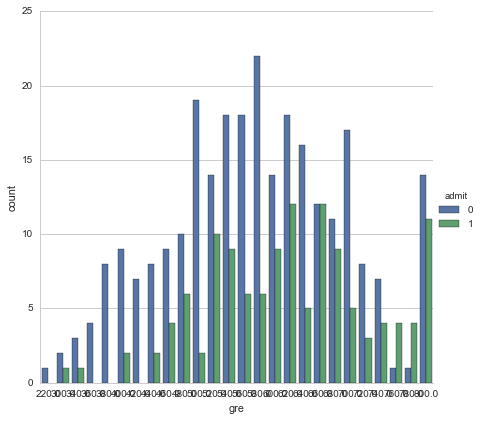

In [12]:
# for each GRE score level, how many students are admitted and how many are rejected?

sns.factorplot('gre', data=admissions_csv ,hue='admit', kind='count', size=6)

<bound method Grid.add_legend of <seaborn.axisgrid.FacetGrid object at 0x000000000C009438>>

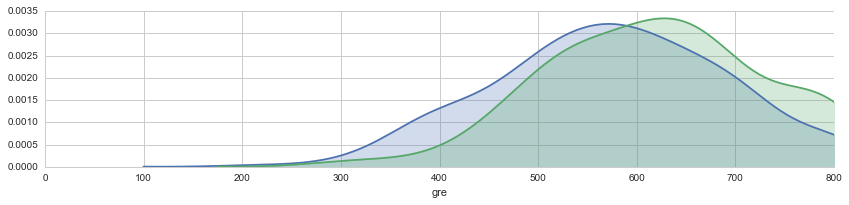

In [14]:
# Now look at KDE of that distribution

fig = sns.FacetGrid(admissions_csv,hue='admit',aspect=4)
fig.map(sns.kdeplot,'gre', shade=True)

smartest = admissions_csv['gre'].max()

fig.set(xlim=(0,smartest))

fig.add_legend

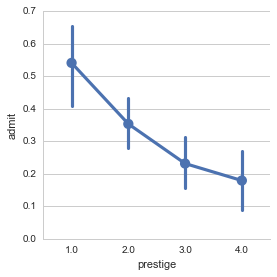

In [16]:
# What's your likelihood of being admitted given your prestige level?

sns.factorplot('prestige','admit',data=admissions_csv)

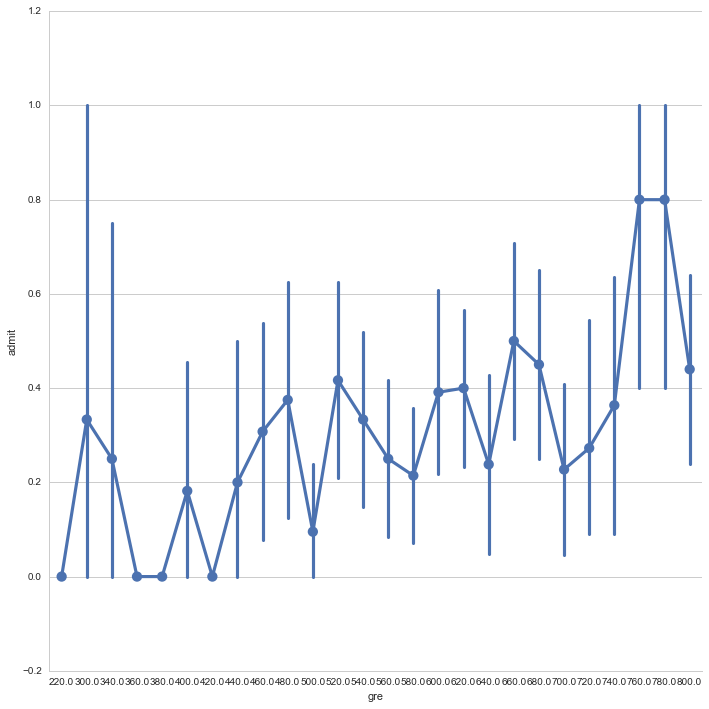

In [19]:
# What's your likelihood of being admitted given your GPA?

sns.factorplot('gre','admit',data=admissions_csv, size=10)

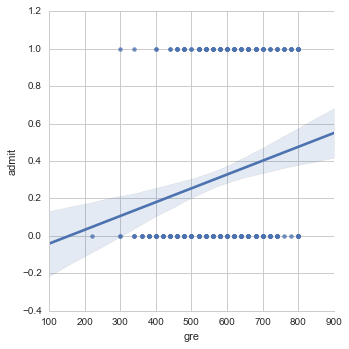

In [20]:
# What's the linear regression line for GRE as a predictor?

sns.lmplot('gre','admit',data=admissions_csv)

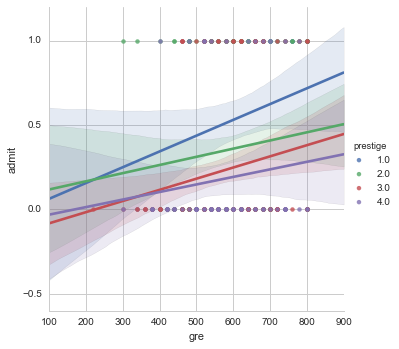

In [21]:
# What's the linear regression line for GRE as a predictor FOR EACH prestige level?

sns.lmplot('gre','admit',hue='prestige',data=admissions_csv)

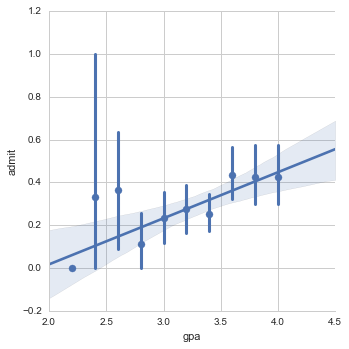

In [27]:
# GPA is too messy, let's create GPA bins

gpa_bins = [1.8,2.0,2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2]

sns.lmplot('gpa','admit',data=admissions_csv,x_bins=gpa_bins)

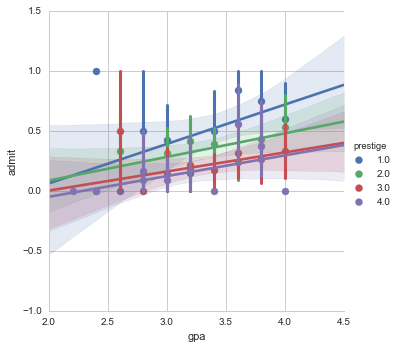

In [28]:
sns.lmplot('gpa','admit',hue='prestige',data=admissions_csv,x_bins=gpa_bins)

## HOMEWORK QUESTIONS

#### 1. Identify features of the dataset, including the outcome and covariates/predictors

In [ ]:
# outcome is admit (binary 0|1).  gre (flloat), gpa (float), and prestige (float/int) are covariates/predictors.

#### 2. Create a data dictionary with classification of available variables

In [4]:
dict = {'admit':'int64', 'gre':'float64', 'gpa':'float64', 'prestige':'float64'}

#### 3. Write a high quality problem statement

In [5]:
# Can we predict admission decision for each candidate with GRE, GPA, and Prestige parameters?

#### 4. State the risks and assumptions of your data

In [8]:
# We assume that each of these variables have an impact on admission decision.
# The risk is that there maybe other factors outside of these three variables that affect admission.

#### 5. Outline exploratory analysis methods

In [ ]:
admit probability = (A)*gpa + (B)*gre + (C)*prestige + some_constant

If prob > 50%, then we predict admit (1)
If prob < 50%, then we predict reject (0)